# Using Gradient Descent Functions on Temperature Data

## Script Contents
### 1. Import Libraries
### 2. Reduce Dataset
### 3. Run Data through Gradient Descent

# 1. Import Libraries

In [4]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
import plotly.graph_objects as go

In [5]:
# Assign path
path = r'C:\Users\X1\Climate Wins Analysis'

In [6]:
# Import scaled climate dataset

climate_scaled = pd.read_csv(os.path.join(path,'Data Sets','climate_scaled.csv'))

In [7]:
climate_scaled

Unnamed: 0        id     MONTH  BASEL_cloud_cover  BASEL_wind_speed  \
0               0 -1.731975 -1.599964           0.660514          -0.02793   
1               1 -1.731824 -1.599964           0.244897          -0.02793   
2               2 -1.731673 -1.599964           1.076130          -0.02793   
3               3 -1.731523 -1.599964          -1.001953          -0.02793   
4               4 -1.731372 -1.599964           0.244897          -0.02793   
...           ...       ...       ...                ...               ...   
22945       22945  1.731372  1.013583          -1.833187          -0.02793   
22946       22946  1.731523  1.013583           0.244897          -0.02793   
22947       22947  1.731673  1.013583          -0.586336          -0.02793   
22948       22948  1.731824  1.013583          -0.170720          -0.02793   
22949       22949  1.731975  1.013583          -0.170720          -0.02793   

       BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0            0.826097       -0.001949               -1.101066   
1            0.735760       -0.001949               -1.058108   
2            1.277781       -0.001949               -1.251420   
3            1.458455       -0.001949               -0.821838   
4            1.729466       -0.001949               -0.746661   
...               ...             ...                     ...   
22945        0.284075        1.037367               -0.005632   
22946        0.103401        0.976231               -0.005632   
22947        0.013064        0.716402               -0.005632   
22948        0.374412        0.487141               -0.005632   
22949        0.735760        0.196744               -0.005632   

       BASEL_precipitation  BASEL_snow_depth  ...  VALENTIA_humidity  \
0                -0.265148         -0.179228  ...           0.761754   
1                 1.658760         -0.179228  ...           1.183580   
2                 0.155707         -0.179228  ...           1.183580   
3                -0.445514         -0.179228  ...           0.480538   
4                -0.164944         -0.179228  ...          -0.363113   
...                    ...               ...  ...                ...   
22945            -0.004619         -0.179228  ...          -0.081896   
22946            -0.004619         -0.179228  ...          -0.081896   
22947            -0.004619         -0.179228  ...          -0.081896   
22948            -0.004619         -0.179228  ...          -0.081896   
22949            -0.004619         -0.179228  ...          -0.081896   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
0              -1.299744                  -0.806427               -0.088407   
1              -1.262455                  -1.042055                0.503361   
2              -0.432779                  -1.136306               -0.396127   
3               0.387574                  -1.183432                0.669056   
4               1.729970                  -0.794645               -0.490810   
...                  ...                        ...                     ...   
22945          -0.003958                  -0.005290               -0.005560   
22946          -0.003958                  -0.005290               -0.005560   
22947          -0.003958                  -0.005290               -0.005560   
22948          -0.003958                  -0.005290               -0.005560   
22949          -0.003958                  -0.005290               -0.005560   

       VALENTIA_snow_depth  VALENTIA_sunshine  VALENTIA_temp_mean  \
0                -0.024706           0.372147           -0.668215   
1                -0.024706          -0.829285           -0.548046   
2                -0.024706          -1.009500           -0.067372   
3                -0.024706          -1.039536           -0.998679   
4                -0.024706           0.672505           -1.509396   
...                    ...                ...                

In [8]:
# Reduce to just the mean temperatures

df = climate_scaled[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [9]:
df

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
0      19600101 -1.599964        -0.528623           -1.016876   
1      19600102 -1.599964        -0.582946           -1.107669   
2      19600103 -1.599964        -0.257010           -1.084971   
3      19600104 -1.599964        -0.555784           -1.209812   
4      19600105 -1.599964        -1.003946           -1.209812   
...         ...       ...              ...                 ...   
22945  20221027  1.013583         0.747959            0.628750   
22946  20221028  1.013583         0.856604            0.367720   
22947  20221029  1.013583         0.856604            0.083991   
22948  20221030  1.013583         0.680055            0.265577   
22949  20221031  1.013583         0.422023            0.197483   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
0               -1.099163         -0.114356             -0.105836   
1               -1.110927         -0.367511             -0.370915   
2               -1.063873         -0.509912             -0.532908   
3               -1.146217         -0.525734             -0.577088   
4               -1.087400         -0.320045             -0.444548   
...                   ...               ...                   ...   
22945           -0.005167          0.898267              1.042841   
22946           -0.005167          0.945734              1.278467   
22947           -0.005167          0.914089              1.101748   
22948           -0.005167          0.692578              0.880848   
22949           -0.005167          0.439422              0.659949   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
0             -0.927601           -0.106469         -0.182904   
1             -0.825294           -0.892676         -0.212437   
2             -0.940389           -0.490837         -0.389635   
3             -1.042696           -0.316124         -0.493001   
4             -0.978754           -0.403481         -0.552067   
...                 ...                 ...               ...   
22945          0.440753            0.906865         -0.005705   
22946          0.466330            0.802037         -0.005705   
22947          0.786039            0.924336         -0.005705   
22948          0.376811            0.697210         -0.005705   
22949          0.159409            0.435140         -0.005705   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
0                -1.370824             -0.097084         -0.988280   
1                -1.043881             -0.232112         -0.691740   
2                -0.741156             -0.487164         -0.853490   
3                -0.910682             -0.472161         -0.624345   
4                -0.862246             -0.307127         -0.381721   
...                    ...                   ...               ...   
22945             0.481853              1.268193          0.683127   
22946             0.263891              1.313202          0.561815   
22947             0.300218              1.208181          0.548336   
22948             0.397090              0.923123          0.103526   
22949             0.348654              0.773092         -0.112140   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
0               -0.265742       -0.186575       -1.280450   
1               -0.353714       -0.368598       -0.539569   
2               -0.403983       -0.550620       -0.876333   
3               -0.642763       -0.417137       -0.775304   
4               -0.906678       -0.332193       -0.926848   
...                   ...             ...             ...   
22945            0.664244        0.395898       -0.000746   
22946            0.890456        0.541516       -0.000746   
22947            1.053832        0.395898       -0.000746   
22948            0.689378       -0.065226       -0.000746   
22949            0.488300        0.335224       -0.000746   

       SONNBLICK_temp_mean  STOCKH

# 2. Reduce Dataset

In [11]:
# You'll need to reduce the dataset to only one year of data. Analyze and pick which year you want to use.

In [12]:
# Drop the DATE and MONTH data as those numbers are not scaled with the rest.

notemp = df.drop(['DATE','MONTH'], axis=1)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 [Text(1, 0, 'BASEL_temp_mean'),
  Text(2, 0, 'BELGRADE_temp_mean'),
  Text(3, 0, 'BUDAPEST_temp_mean'),
  Text(4, 0, 'DEBILT_temp_mean'),
  Text(5, 0, 'DUSSELDORF_temp_mean'),
  Text(6, 0, 'GDANSK_temp_mean'),
  Text(7, 0, 'HEATHROW_temp_mean'),
  Text(8, 0, 'KASSEL_temp_mean'),
  Text(9, 0, 'LJUBLJANA_temp_mean'),
  Text(10, 0, 'MAASTRICHT_temp_mean'),
  Text(11, 0, 'MADRID_temp_mean'),
  Text(12, 0, 'MUNCHENB_temp_mean'),
  Text(13, 0, 'OSLO_temp_mean'),
  Text(14, 0, 'ROMA_temp_mean'),
  Text(15, 0, 'SONNBLICK_temp_mean'),
  Text(16, 0, 'STOCKHOLM_temp_mean'),
  Text(17, 0, 'TOURS_temp_mean'),
  Text(18, 0, 'VALENTIA_temp_mean')])

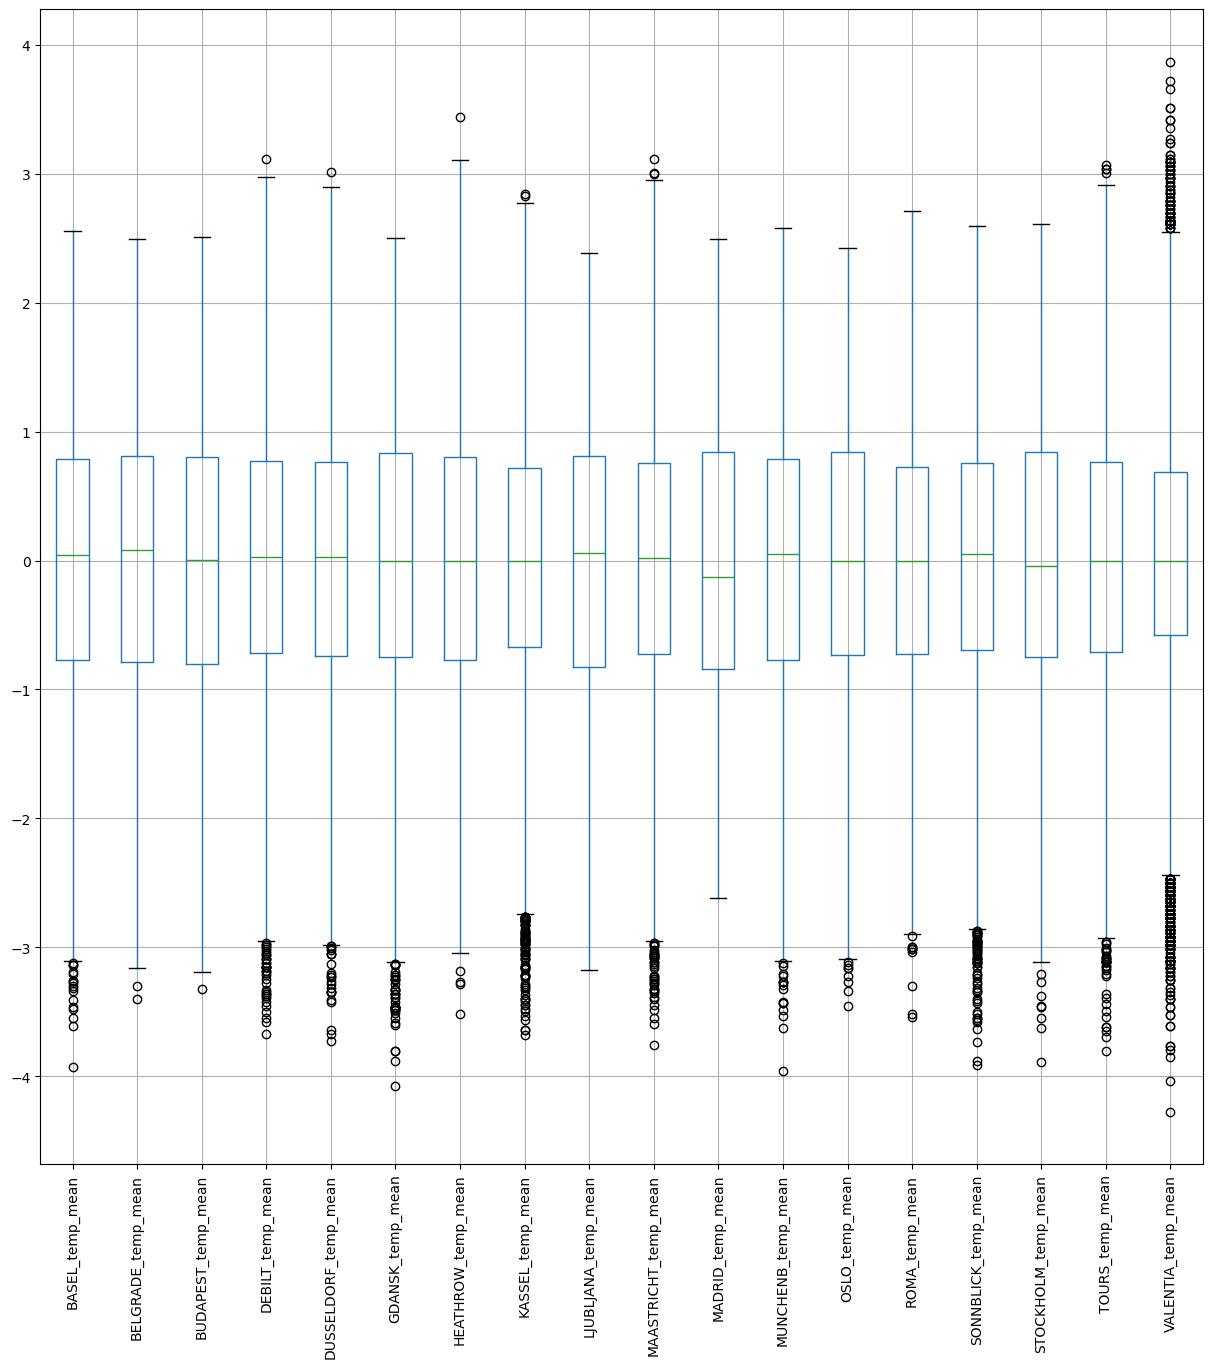

In [13]:
# Look at a whisker plot of the data to see variations in temperatures.

notemp.boxplot(figsize=(15,15))
plt.xticks(rotation=90)

# 2.1 Select Year

In [15]:
# Reduce your dataset to a single year.

dfyear = df[df['DATE'].astype(str).str.contains('2022')] #<-----INSERT YEAR HERE
dfyear

DATE     MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
781    19620220 -1.309570        -1.166914           -1.039574   
782    19620221 -1.309570        -1.085430           -1.107669   
783    19620222 -1.309570        -1.411366           -1.459493   
784    19620223 -1.309570        -1.533592           -1.765920   
785    19620224 -1.309570        -1.859527           -1.697825   
...         ...       ...              ...                 ...   
22945  20221027  1.013583         0.747959            0.628750   
22946  20221028  1.013583         0.856604            0.367720   
22947  20221029  1.013583         0.856604            0.083991   
22948  20221030  1.013583         0.680055            0.265577   
22949  20221031  1.013583         0.422023            0.197483   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
781             -0.769788         -0.589023             -0.650721   
782             -0.899185         -0.889645             -0.959981   
783             -1.228561         -1.633290             -1.475413   
784             -1.593226         -1.759868             -1.593226   
785             -1.675570         -1.728223             -1.666859   
...                   ...               ...                   ...   
22945           -0.005167          0.898267              1.042841   
22946           -0.005167          0.945734              1.278467   
22947           -0.005167          0.914089              1.101748   
22948           -0.005167          0.692578              0.880848   
22949           -0.005167          0.439422              0.659949   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
781           -0.582315           -0.735435         -0.374868   
782           -1.106638           -1.049918         -0.921230   
783           -1.464712           -1.539113         -1.526658   
784           -1.004331           -1.713826         -1.526658   
785           -1.515865           -1.364400         -1.556191   
...                 ...                 ...               ...   
22945          0.440753            0.906865         -0.005705   
22946          0.466330            0.802037         -0.005705   
22947          0.786039            0.924336         -0.005705   
22948          0.376811            0.697210         -0.005705   
22949          0.159409            0.435140         -0.005705   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
781              -0.947009             -0.742216         -0.610866   
782              -0.910682             -0.967261         -0.745657   
783              -1.286061             -1.567383         -0.920885   
784              -1.564568             -1.702411         -0.947843   
785              -1.516132             -1.717414         -0.961322   
...                    ...                   ...               ...   
22945             0.481853              1.268193          0.683127   
22946             0.263891              1.313202          0.561815   
22947             0.300218              1.208181          0.548336   
22948             0.397090              0.923123          0.103526   
22949             0.348654              0.773092         -0.112140   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
781             -1.032352       -0.247249       -1.330965   
782             -1.007217       -0.805452       -0.994201   
783             -1.447075       -1.400060       -0.893171   
784             -1.660721       -0.963205       -1.482509   
785             -1.748692       -0.441407       -1.920302   
...                   ...             ...             ...   
22945            0.664244        0.395898       -0.000746   
22946            0.890456        0.541516       -0.000746   
22947            1.053832        0.395898       -0.000746   
22948            0.689378       -0.065226       -0.000746   
22949            0.488300        0.335224       -0.000746   

       SONNBLICK_temp_mean  STOCKH

In [16]:
dfyear.describe()

DATE       MONTH  BASEL_temp_mean  BELGRADE_temp_mean  \
count  3.610000e+02  361.000000       361.000000          361.000000   
mean   2.016567e+07   -0.447236         0.239380            0.183996   
std    1.440054e+05    0.852519         1.081469            1.048458   
min    1.962022e+07   -1.599964        -1.900269           -1.970204   
25%    2.022020e+07   -1.309570        -0.745913           -0.733147   
50%    2.022050e+07   -0.438387         0.231894            0.265577   
75%    2.022080e+07    0.432795         1.209701            1.116763   
max    2.022103e+07    1.013583         2.486282            2.138187   

       BUDAPEST_temp_mean  DEBILT_temp_mean  DUSSELDORF_temp_mean  \
count          361.000000        361.000000            361.000000   
mean            -0.149782          0.198320              0.199425   
std              0.379190          0.984377              1.019892   
min             -1.852021         -2.060490             -1.931938   
25%             -0.005167         -0.573200             -0.650721   
50%             -0.005167          0.170444              0.159243   
75%             -0.005167          1.009023              1.072294   
max             -0.005167          2.670357              2.633317   

       GDANSK_temp_mean  HEATHROW_temp_mean  KASSEL_temp_mean  \
count        361.000000          361.000000        361.000000   
mean           0.148498            0.246780         -0.154475   
std            0.962633            1.096620          0.395000   
min           -1.720479           -2.203021         -2.028720   
25%           -0.671834           -0.648078         -0.005705   
50%            0.159409            0.260428         -0.005705   
75%            0.862769            1.064106         -0.005705   
max            2.397371            3.440199          0.097660   

       LJUBLJANA_temp_mean  MAASTRICHT_temp_mean  MADRID_temp_mean  \
count           361.000000            361.000000        361.000000   
mean              0.220520              0.236349          0.249556   
std               1.076029              1.043595          1.115370   
min              -1.843075             -1.987469         -1.608319   
25%              -0.692720             -0.652197         -0.745657   
50%               0.251782              0.217980          0.170921   
75%               1.220503              1.088156          1.100979   
max               2.382967              2.993544          2.489325   

       MUNCHENB_temp_mean  OSLO_temp_mean  ROMA_temp_mean  \
count          361.000000      361.000000      361.000000   
mean             0.239703        0.147587       -0.155882   
std              1.019069        0.913979        0.429668   
min             -1.861799       -2.067477       -2.105522   
25%             -0.617629       -0.611295       -0.000746   
50%              0.199251        0.189606       -0.000746   
75%              1.116669        0.917697       -0.000746   
max              2.411109        1.961294       -0.000746   

       SONNBLICK_temp_mean  STOCKHOLM_temp_mean  TOURS_temp_mean  \
count           361.000000           361.000000       361.000000   
mean              0.164282             0.137635         0.334724   
std               1.105758             0.978816         1.147620   
min              -2.493596            -1.771976        -2.171212   
25%              -0.709334            -0.714527        -0.571074   
50%               0.226672             0.168754         0.338809   
75%               1.104177             0.852986         1.311442   
max               2.215685             2.246331         2.676266   

       VALENTIA_temp_mean  
count          361.000000  
mean            -0.147845  
std              0.439692  
min             -2.681040  
25%             -0.007287  
50%             -0.007287  
75%             -0.007287  
max              0.233050

In [17]:
# Pick which weather station you want to use. Below is a 3D visualization of the temperatures for that year.

In [18]:
# Drop the DATE and MONTH data as those numbers are not scaled with the rest.

notempyear = dfyear.drop(['DATE','MONTH'], axis=1)

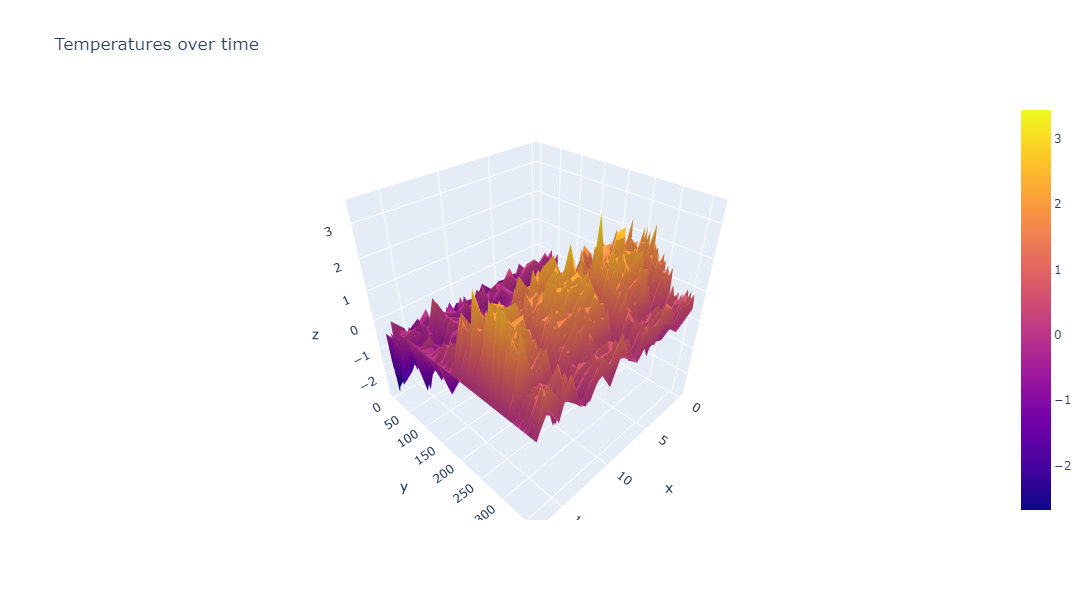

In [19]:
#Plot ALL weather data for all stations for a year 

#X = weather station
#Y = day of the year
#Z = temperature

# You can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(z=notempyear.values)])
fig.update_layout(title='Temperatures over time', autosize=False,
                  width=600, height=600)
fig.show()

In [20]:
# We need to make an index for the year. Create a set of data from 1 to 365 (or to 366 if it's a leap year!)
# We'll scale this by 100 as the index is made. This will help the gradient descent converge 366 = 3.66

i = np.arange(0.01,3.62,0.01) #<---needs to be one GREATER than the total number of days
index = pd.DataFrame(data = i, columns = ['index'])
index

index
0     0.01
1     0.02
2     0.03
3     0.04
4     0.05
..     ...
356   3.57
357   3.58
358   3.59
359   3.60
360   3.61

[361 rows x 1 columns]

In [21]:
n_rows = dfyear.shape[0]
n_rows

361

In [22]:
# This will translate your chosen weather data into the X and y datasets needed for the optimization function.

X=index.to_numpy().reshape(n_rows,1)

# Represent x_0 as a vector of 1s for vector computation.

ones = np.ones((n_rows,1))
X = np.concatenate((ones, X), axis=1)
y=dfyear['VALENTIA_temp_mean'].to_numpy().reshape(n_rows,1) #<----INSERT WEATHER STATION HERE

In [23]:
X.shape, y.shape

((361, 2), (361, 1))

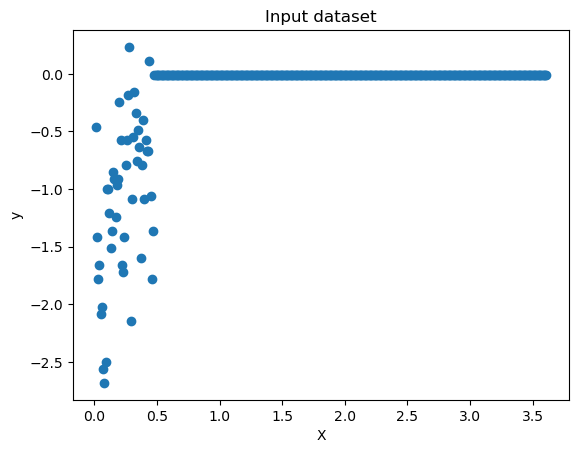

In [24]:
#Look at one year of temperature data over time.

plt.scatter(x=index['index'], y=dfyear['VALENTIA_temp_mean']) #<----INSERT WEATHER STATION HERE
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');
plt.show()

In [25]:
# What is the min temperature? (Note gradient descent is not actually finding this number)

dfyear['VALENTIA_temp_mean'].min()

-2.681040022915153

In [26]:
# What is the max temperature? (Note gradient descent is not actually finding this number)
dfyear['VALENTIA_temp_mean'].max()

0.2330499665788886

In [27]:
#This computes the loss function for the gradiant descent. DO NOT CHANGE!

def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [28]:
compute_cost(X,y)

array([0.10732582])

In [29]:
#This is the gradiant descent function. DO NOT CHANGE!

def gradient_descent(X, y, theta=np.array([[0],[0]]),
                    alpha=0.01, num_iterations=1500):
    """
    Solve for theta using Gradient Descent optimiztion technique. 
    Alpha is the learning rate
    """
    m = len(y)
    J_history = []
    theta0_history = []
    theta1_history = []
    theta = theta.reshape(2,1)
    
    for i in range(num_iterations):
        error = (np.dot(X, theta) - y)
        
        term0 = (alpha/m) * sum(error* X[:,0].reshape(m,1))
        term1 = (alpha/m) * sum(error* X[:,1].reshape(m,1))
        
        # update theta
        term_vector = np.array([[term0],[term1]])
        #print(term_vector)
        theta = theta - term_vector.reshape(2,1)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(compute_cost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

# 3. Run Data through Gradient Descent

In [31]:
%%time

#This runs your data through a gradiant descent for the starting conditions in 'theta_init.'
#You will need to adjust these numbers

num_iterations=300 #<---Decide how many iterations you need. Start small and work up. Over 10,000 iterations will take a few seconds.
theta_init=np.array([[1],[1]]) #<---this is where you put the guess for [theta0], [theta1]. Start with 1 and 1.
alpha=0.01 #<---Decide what your step size is. Try values between 0.1 and 0.00001. You will need to adjust your iterations.

#If your solution is not converging, try a smaller step size.

theta, J_history, theta0_history, theta1_history = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

CPU times: total: 219 ms
Wall time: 232 ms


In [32]:
theta

array([[ 0.00145154],
       [-0.02119197]])

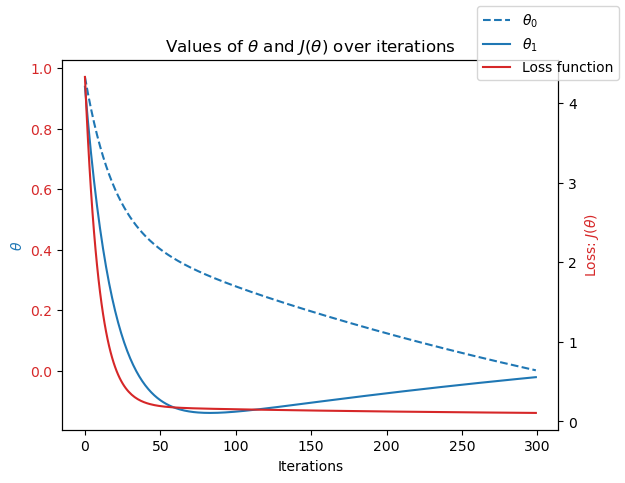

In [33]:
#This will plot your loss, theta0, and theta1. If the result looks like a straight line, it's not converging on an answer!
#Your loss (red) should be trending toward 0.

fig, ax1 = plt.subplots()

# Plot thetas over time
color='tab:blue'
ax1.plot(theta0_history, label='$\\theta_{0}$', linestyle='--', color=color)
ax1.plot(theta1_history, label='$\\theta_{1}$', linestyle='-', color=color)
# ax1.legend()
ax1.set_xlabel('Iterations'); ax1.set_ylabel('$\\theta$', color=color);
ax1.tick_params(axis='y', labelcolor=color)

# Plot loss function over time
color='tab:red'
ax2 = ax1.twinx()
ax2.plot(J_history, label='Loss function', color=color)
ax2.set_title('Values of $\\theta$ and $J(\\theta)$ over iterations')
ax2.set_ylabel('Loss: $J(\\theta)$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# ax2.legend();
fig.legend()
plt.show()

In [34]:
%%time

# Theta range

theta0_vals = np.linspace(-10,10,100) #Look in the chart above for the limits of where theta0 and theta1 appear.
theta1_vals = np.linspace(-10,10,100) #Put those values as the first two "linspace" numbers in these lines
                                      #Select with large margins, maybe +/- 10
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Compute cost for each combination of theta

c1=0; c2=0
for i in theta0_vals:
    for j in theta1_vals:
        t = np.array([i, j])
        J_vals[c1][c2] = compute_cost(X, y, t.transpose()).tolist()[0]
        c2=c2+1
    c1=c1+1
    c2=0 # reinitialize to 0

CPU times: total: 2.55 s
Wall time: 2.58 s


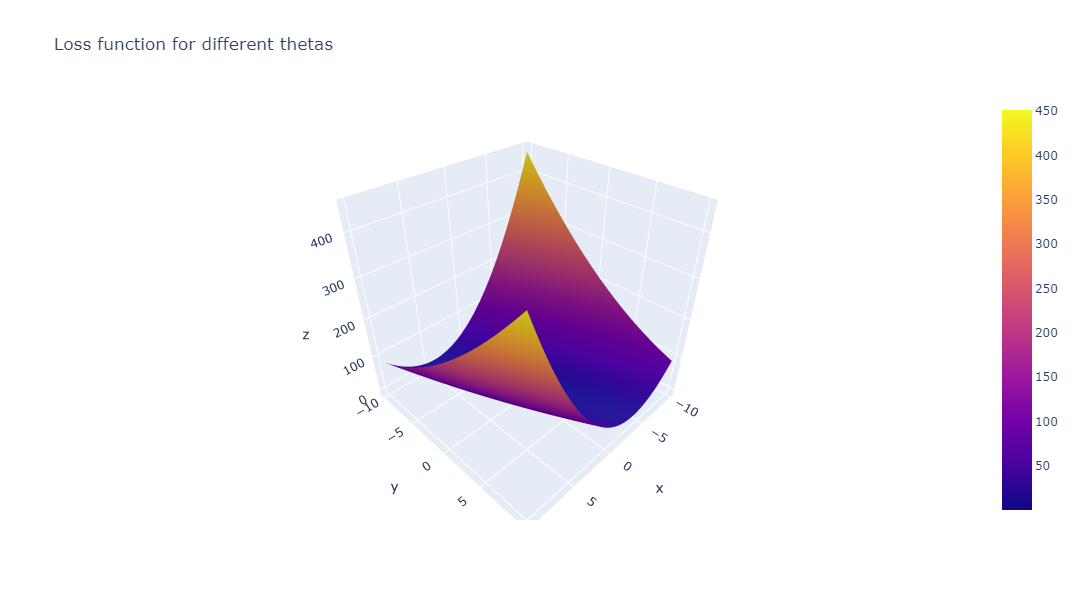

In [35]:
#This figure shows the loss function.

#X = Theta0
#Y - Theta1
#Z = Loss
# Find where it is closest to 0 in X and Y!

# You can click/hold in the graph below to rotate!

fig = go.Figure(data=[go.Surface(x=theta1_vals, y=theta0_vals, z=J_vals)])
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

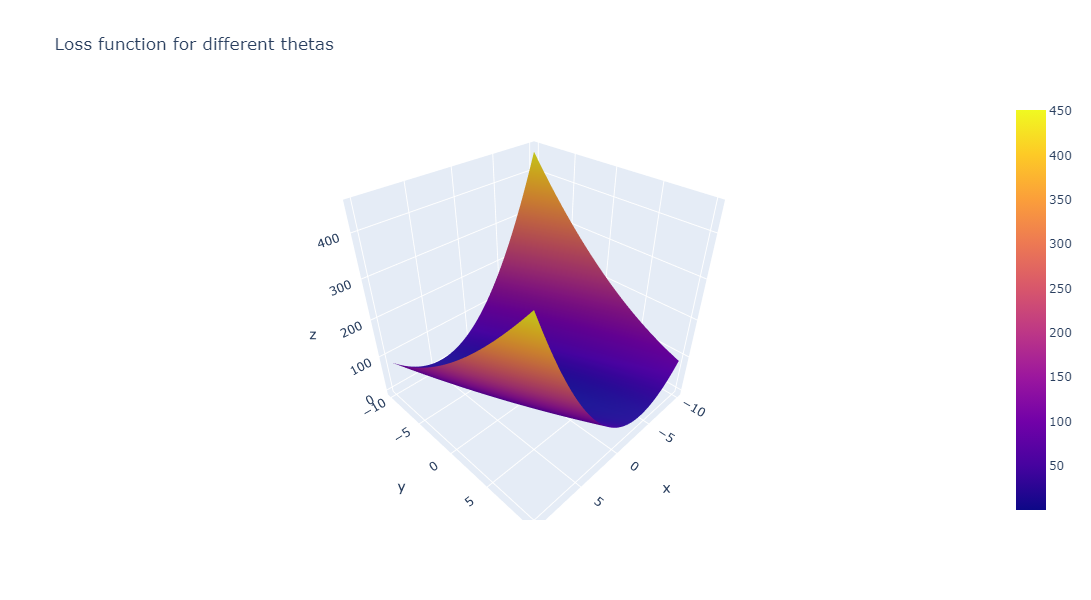

In [36]:
#Here is the same figure as above, with the line the loss function takes toward the minimum.

#X = Theta0
#Y - Theta1
#Z = Loss
# black line = path of loss function over the iterations.
# Find where it is closest to 0 in X and Y!

# You can click/hold in the graph below to rotate!

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history, y=theta0_history, z=J_history, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history, theta1_history, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

# 3.1 Rerun the Optimization

In [38]:
#Rerun the optimization above, but this time start closer to the objective!
#Find where the black line ends near the lowest X/Y/Z coordinate and make that your guess below.

num_iterations=150 #<---start with the same iterations as above
theta_init=np.array([[0],[0]]) #<---make a guess as to a more accurate [x],[y] coordinates near the minimum in the graph above.
alpha= 0.1 #<---start with the same step size as above
theta1, J_history1, theta0_history1, theta1_history1 = gradient_descent(X,y, theta_init,
                                                                   alpha, num_iterations)

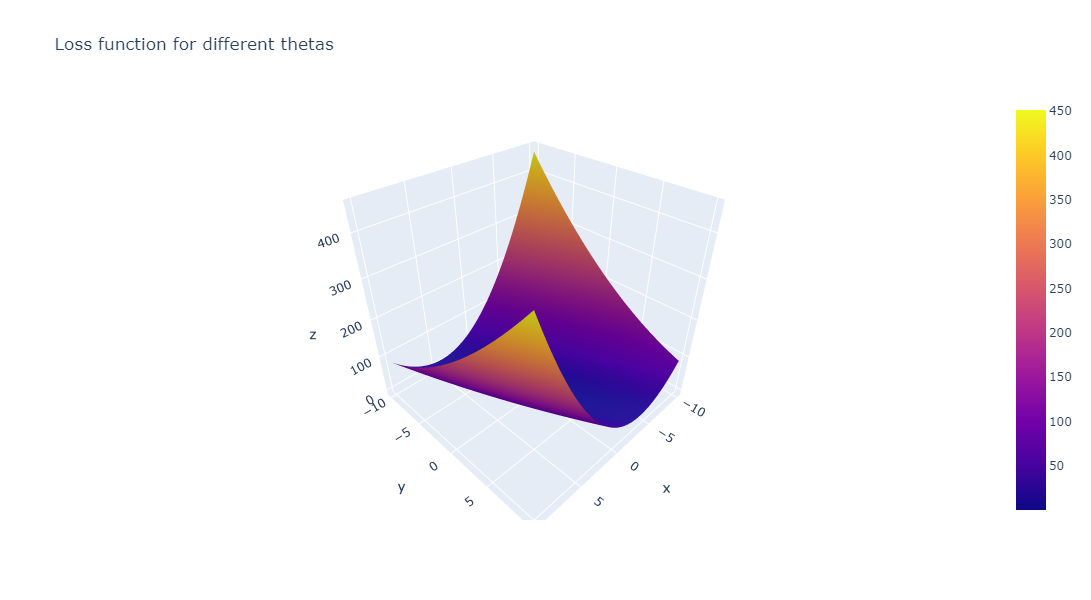

In [39]:
#Let's look at the new loss path on the function. It should start much closer to the goal

line_marker = dict(color='#101010', width=2)
fig = go.Figure()
fig.add_surface(x=theta1_vals, y=theta0_vals, z=J_vals)
fig.add_scatter3d(x=theta1_history1, y=theta0_history1, z=J_history1, line=line_marker, name='')
#The below line adds a graph of just the loss over iterations in a 2D plane
plt.plot(theta0_history1, theta1_history1, 'r+');
fig.update_layout(title='Loss function for different thetas', autosize=True,
                  width=600, height=600, xaxis_title='theta0', 
                 yaxis_title='theta1')
fig.show()

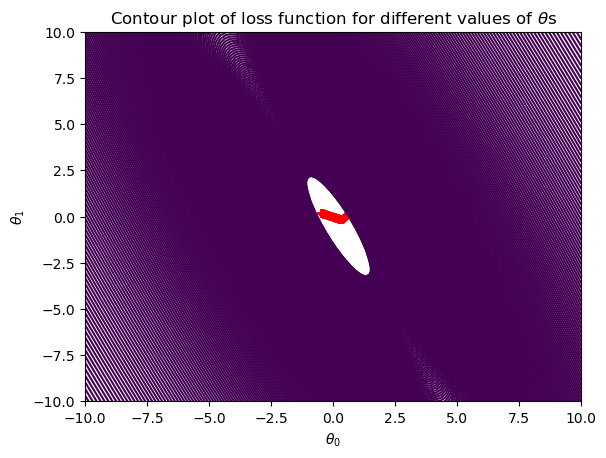

In [40]:
#This plot shows the convergence similar to above, but only in the X/Y plane (there's no height)

plt.contour(theta0_vals, theta1_vals, J_vals, levels = np.logspace(0,10,1000))
plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
plt.title("Contour plot of loss function for different values of $\\theta$s");
plt.plot(theta0_history1, theta1_history1, 'r+');
plt.show()

In [41]:
#How well does gradient descent converge? How much do you need to adjust between different weather stations and years?

# Observations: 
## Overall, almost every weather station had a good gradient descent convergence, except for Valentia 1965 where the theta and loss lines did not cross each other completely.  
## Starting the iterations with Stockholm around 150 didn’t need much adjusting over the years, including with Tours.
## - However with Valentia, the starting iterations needed large adjustments (to 300) in order to get as close as possible to zero.
## Valentia had the greatest change in temperature over 60 years
## - Mean Temp Max dropped by 2.01
## Tours had the least amount of change in temperature
## - Mean Temp Min returned to its original temperature at -2.17
## - Mean Temp Max increased by 1.04
